# Gun Violence Incidents in USA - Exploration

Gun violence in the US results in tens of thousands of deaths and injuries annually. In 2013, there were 73,505 nonfatal firearm injuries which included 11,208 homicides, 21,175 suicides, 505 deaths due to accidental or negligent discharge of a firearm, and 281 deaths due to firearms use with "undetermined intent". In this notebook, I have performed a deep exploration on Gun Violence in USA. 

**Contents**

[1. Dataset Preparation](#1)    
[2. Exploring the Time Related Trends](#2)    
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Number of Incidents per Year](#2.1)    
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Average Number of Incidents per Month](#2.2)    
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Average Number of Incidents per WeekDay](#2.3)    
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Time Series of Incidents, People Killed and Injured](#2.4)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4.1 Is July 4th most Dangerous](#2.4.1)    
[3. Exploring the Location Related Trends](#3)        
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Total Number of Incidents by State](#3.1)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Total People Killed&Injured by State](#3.2)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Population Adjusted - Incidents per 100K by State](#3.3)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.4 Population Adjusted - Incidents per 100K by City](#3.4)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.5 Population Adjusted - People Killed per 100K by City](#3.5)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.6 Population Adjusted - People Injured per 100K by City](#3.6)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.7 Common Areas of Gun Violence Incidents](#3.7)    
[4. Other characteristics of Gun Violence Incidents](#4)        
&nbsp;&nbsp;&nbsp;&nbsp;[4.1 Number of Guns Used in the Incidents ](#4.1)     
&nbsp;&nbsp;&nbsp;&nbsp;[4.2 Most Serious Gun Violence Incidents](#4.2)     
&nbsp;&nbsp;&nbsp;&nbsp;[4.3 Key Characteristics of Gun Violence Incidents ](#4.3)       
&nbsp;&nbsp;&nbsp;&nbsp;[4.4 Prominent Age of Suspects](#4.4)       
&nbsp;&nbsp;&nbsp;&nbsp;[4.5 Prominent Age of Victims ](#4.5)       
&nbsp;&nbsp;&nbsp;&nbsp;[4.6 Gender Group - Suspects and Victims ](#4.6)       
[5. Analysis of Number of Guns Registered Per State](#5)        
[6. Gun Laws Impact on Incidents ](#6)        
&nbsp;&nbsp;&nbsp;&nbsp;[6.1 Rise of Gun Laws in different States ](#6.1)       
&nbsp;&nbsp;&nbsp;&nbsp;[6.2 Impact of Gun Laws ](#6.2)       

<br><br>

## <a id="1">1. Dataset Preparation</a>

As the first step, let us import the required libraries, load the dataset, and perform data wrangling techniques 

In [199]:
# Import the required libraries 
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from textblob import TextBlob 
import chart_studio as py
from chart_studio import tools
import seaborn as sns
import pandas as pd
import string, os, random
import calendar
from PIL import Image 
import numpy as np

import folium 
from folium import plugins 


init_notebook_mode(connected=True)
punc = string.punctuation
from datetime import datetime

# Load the dataset
df = pd.read_csv(r"C:\Users\Bara Elshaer\Documents\Python\Data Science\Capstone Project\Data Sets\gun-violence-data_01-2013_03-2018.csv")


### Fixed a row in the dataset 
### I have manually added this incident
### Related Thread: https://www.kaggle.com/jameslko/gun-violence-data/discussion/55307
missing_row = ['sban_1', '2017-10-01', 'Nevada', 'Las Vegas', 'Mandalay Bay 3950 Blvd S', 59, 489, 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', '-', '-', '-', '-', '-', '36.095', 'Hotel', 
               '-115.171667', 47, 'Route 91 Harvest Festiva; concert, open fire from 32nd floor. 47 guns seized; TOTAL:59 kill, 489 inj, number shot TBD,girlfriend Marilou Danley POI', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
df.loc[len(df)] = missing_row

# Reformatting the dates
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['loss'] = df['n_killed'] + df['n_injured']

In [62]:
#To open this data set in a new notebook:
df.to_pickle("df.pkl")

In [83]:
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,loss
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,1,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,2013,1,1,1,4
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,2013,1,1,1,4
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,2013,1,5,5,4
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,2013,1,7,0,4
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72,11,2013,1,7,0,4
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10,14,2013,1,19,5,5
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93,5,2013,1,21,0,5
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11,7,2013,1,21,0,4
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.baltimoresun.com/2013-08-25/ne...,NaN,44,2013,1,23,2,7


## <a id="2">2. Exploring Time Related Trends of Gun Violence</a>

In this section, I will analyze the time related trends related to Gun Violence Incidents. This includes the number of incidents which occured by years, months, weekdays etc. 

### <a id="2.1">2.1 Number of Gun Violence Incidents by Years </a>

Plotting the number of gun violence incidents by years. I have not included the data from earlier than 2014. 

In [51]:
# function to aggregate and return keys and values
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x1, y1 = create_stack_bar_data('year')
x1 = x1[:-1]
y1 = y1[:-1]
trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="year count", marker=dict(color=['rgba(10, 220, 150, 0.6)', 'rgba(10, 220, 150, 0.6)', 'rgba(10, 220, 150, 0.6)', 'rgba(10, 220, 150, 0.6)', 'rgba(222,45,38,0.8)']))
layout = dict(height=400, title='Gun Violence Incidents by year', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

> From the above graph, we can observe that the number of gun violence incidents are increasing every year. In the year 2014, there were about 51 thousand incidents reported, The number increased to 53 thousand in the next year, 2016 saw a bigger jump with close to 58 thousand incidents reported, in 2017, the number of gun violence incidents further increased to 61 thousand. A big increase of 10,000 incidents have been observed from 2014 to 2017. The data available is only halfway of 2018 and this number has grown ever since...

In [107]:
df1=df['n_killed']

In [93]:
df2=df[df['n_killed']>3].groupby('year').agg(sum)
df2

,n_killed,n_injured,n_guns_involved,month,monthday,weekday,loss
year,,,,,,,
2013,130,18,24.0,180,407,79,148
2014,161,37,16.0,249,551,114,198
2015,231,58,46.0,289,595,158,289
2016,233,97,49.0,264,692,144,330
2017,267,535,102.0,240,586,140,802
2018,76,20,19.0,27,228,51,96


In [109]:
df3=df2["n_killed"]
df3

year
2013    130
2014    161
2015    231
2016    233
2017    267
2018     76
Name: n_killed, dtype: int64

In [114]:
def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    plt.figure(figsize=(6, 4))


<Figure size 432x288 with 0 Axes>

In [185]:
series_labels = ['Mass Shootings', 'Gun Violence Incidents']

data = [
    [161, 231, 233, 267, 76],
    [51854, 53579, 58763, 61402, 13802]
]


category_labels = ['2014', '2015', '2016', '2017', '2018']

data1= pd.DataFrame(data=data, columns= category_labels)

plot_stacked_bar(data1, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}",
    colors=['tab:gray', 'tab:green'],
    y_label="Quantity (units)")




<Figure size 432x288 with 0 Axes>

In [206]:
data2=data1.T

data2.rename(columns={'0':'Mass Shootings','1':'Gun Violence'}, inplace=True)

,0,1
2014,161,51854
2015,231,53579
2016,233,58763
2017,267,61402
2018,76,13802


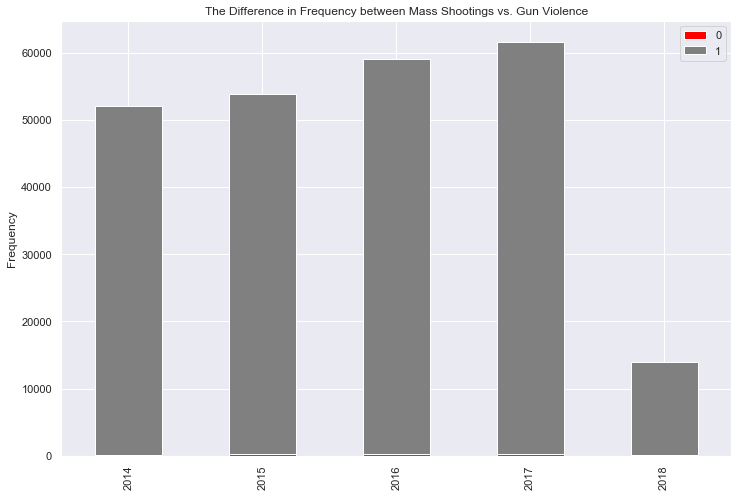

In [222]:
data1.T.plot(kind='bar', stacked=True, color=['red','grey'])
plt.ylabel('Frequency')
plt.title('The Difference in Frequency between Mass Shootings vs. Gun Violence')
plt.show()


In [147]:
df4=df[df['n_killed']>0].groupby('year').agg(sum)
df4.drop(df4.index[0], inplace=True)

In [148]:
trace1 = go.Bar(x=df4.index, y=df4["n_killed"], opacity=0.75, name="year count")
layout = dict(height=400, title='Number of Deaths Due to Gun Violence Per Year', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);




### <a id="2.2">2.2 Average number of incidents per month </a>

Obtaining the average number of incidents per month:

In [7]:
tempdf = df[df['year'].isin(['2014','2015','2016','2017'])]
tempdf1 = tempdf.groupby(['year','month']).agg({'month' : 'count'}).rename(columns={'month': 'month_count'}).reset_index()
aggregated = tempdf1.groupby(['month']).agg({'month_count' : 'mean'})
x2 = aggregated.index.tolist()
y2 = aggregated.month_count.tolist()
mapp = {}
for m,v in zip(x2, y2):
    mapp[m] = v
xn = [calendar.month_abbr[int(x)] for x in sorted(x2)]
vn = [mapp[x] for x in sorted(x2)]

trace1 = go.Bar(x=xn, y=vn, opacity=0.75, name="month", marker=dict(color='rgba(100, 20, 10, 0.6)'))
layout = dict(height=400, title='Average number of Incidents by Months', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

> The months of July and August has the highest number of average number of gun violence incidents than any other month. In these two months, there are about 5200 incidents reported every year. Feburary has the least number of average incidents about 3700 every year. In some next sections, I will try to explore if there is any specific date on which number of gun violence incidents are always higher.  


### <a id="2.3">2.3 Average Number of Gun Violence Incidents by Day of the Week </a>

In [8]:
tempdf1 = df.groupby(['year', 'weekday']).agg({'weekday' : 'count'}).rename(columns={'weekday' : 'weekday_count'}).reset_index()
aggregated = tempdf1.groupby(['weekday']).agg({'weekday_count' : 'mean'})

x2 = aggregated.index.tolist()
y2 = aggregated.weekday_count.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x2 = [weekmap[x] for x in x2]
wkmp = {}
for j,x in enumerate(x2):
    wkmp[x] = y2[j]
order = list(weekmap.values())
ordervals = [wkmp[val] for val in order]

trace1 = go.Bar(x=order, y=ordervals, opacity=0.75, name="weekday", marker=dict(color='rgba(61, 60, 250, 0.6)'))
layout = dict(height=400, title='Average number of by Day of the Week', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

> Number of gun violence incidents are higher on Weekends with approximately 6000 incidents on Saturdays and Sundays in the entire US.


### <a id="2.4">2.4 Time Series plot of Total Incidents, People Killed, People Injured </a>

In [9]:
# 2014 time series
temp = df[df['year'] == 2014].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350, title = 'Gun Violence Incidents - 2014', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)



# 2015 time series
temp = df[df['year'] == 2015].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350, title = 'Gun Violence Incidents - 2015', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)





# 2016 time series
temp = df[df['year'] == 2016].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350,title = 'Gun Violence Incidents - 2016', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)


# 2017 time series
temp = df[df['year'] == 2017].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = '#c5d9f9'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = '#ff9f87'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = '#e8baff'))

data = [trace1, trace2, trace3]
layout = dict(height=350,title = 'Gun Violence Incidents - 2017', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
iplot(fig)

# <a href="2.4.1"> Is 4th July the Most Dangerous Day?</a>

From the above graphs, we can observe **the highest peaks around July 4th** and July 5th every year from 2014 to 2017. This is very interesting as July 4th is Independence Day for United States of America. Everyone enjoins in joyous festitivies from BBQing to lighting up fireworks in the neighborhood and also the grand show of fireworks lighting up the sky. From the data, it seems that 4th july - 5th july are the dates related with very large number of gun violence incidents, but could this truly mean that July 4th can be regarded as the most dangerous date? Do people violently erupt similar to "The Purge"? I would like to believe no because the holiday can contribute to the fact that more people are outside thus there is more people who are reporting gun violence, but in reality it could be the same.  

**July 4th, 2014 :**   Total Incidents : 192, Total Injuries : 92, Total Killed : 48  

**July 4th, 2015 :**  Total Incidents : 211, Total Injuries : 142, Total Killed : 60   


**July 4th, 2016 :**  Total Incidents : 224, Total Injuries : 163, Total Killed : 52  


**July 4th, 2017 :**    Total Incidents : 248, Total Injuries : 146, Total Killed : 62    


<br><br>
A similar trend is observed for July 5th, which is the next day of Independence Day.  

**5th July, 2014** - 212 Incidents   

**5th July, 2015** - 211 Incidents   

**5th July, 2016** - 224 Incidents   

**5th July, 2017** - 248 Incidents  


<br>

After observing this trend on one of the important holiday of US, I am curios to obtain these numbers on other holidays. After investigating the important holidays of US ie. **Christmas, Thanksgiving, Labor Day, Memorial Day**, one can see that number of gun violence incidents are also significantly higher. 

## <a id="3">3. Exploring Location related trends </a>

### <a id="3.1">3.1 Number of Incidents by every state  </a>

In [151]:
states_df = df['state'].value_counts()

statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['state'],
        marker = dict(
            line = dict (color = 'rgb(255,255,255)',
            width = 2) ),
        colorbar = dict(title = "Gun Violence Incidents"))]

layout = dict(
        title = 'Number of Gun Violence Incidents by State Between 2013-2018',
        geo = dict(scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'))
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

> From the above map, Illinoies State has the highest number of gun violence incidents reported in last 5 years, the number is equal to 17,000. It is followed by California with approx 16000 incidents reported, Florida with 15,000 incidents and Texas with 13,000 gun violence incidents. In the next section, I have explored the states having highest gun violence incidents per 100,000 people. 


### <a id="3.2">3.2 Total Loss (Injured + Killed) by every state </a>

In [152]:
statdf = df.reset_index().groupby(by=['state']).agg({'loss':'sum', 'year':'count'}).rename(columns={'year':'count'})
statdf['state'] = statdf.index

trace1 = go.Bar(
    x=statdf['state'],
    y=statdf['count'],
    name='Count of Incidents',
    marker=dict(color='rgb(255,10,225)'),
    opacity=0.6)

trace2 = go.Bar(
    x=statdf['state'],
    y=statdf['loss'],
    name='Total Loss',
    marker=dict(color='rgb(58,22,225)'),
    opacity=0.6)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    margin=dict(b=150),
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'Cumulative Number of Gun Violence Incidents and Total Loss by States')

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

#### Population Adjusted Dataset:

The above analysis was centered around absolute numbers of Incidents and the top locations. However, using an epidemioligcal approach for better analysis, I computed a population adjusted dataset. A population-adjusted rate is a weighted average of the population-specific (crude) rates, where the weights are the proportions of persons in the corresponding population groups of a standard population. The potential confounding effect of different population size is reduced when comparing population-adjusted rates versus using the same standard population. It is a technique used to allow populations to be compared when the profiles of the populations are quite different.


### <a id="3.3">3.3 Incidents Per 100,000 People by State </a>

Exploring how many gun violence incidents occur in different states per 100,000 people and to identify the states with high number of incidents according to the population of the state:

In [153]:
census_2013 = {'Mississippi': 2991207, 'Iowa': 3090416, 'Oklahoma': 3850568, 'Delaware': 925749, 'Minnesota': 5420380, 'Alaska': 735132, 'Illinois': 12882135, 'Arkansas': 2959373, 'New Mexico': 2085287, 'Indiana': 6570902, 'Maryland': 5928814, 'Louisiana': 4625470, 'Texas': 26448193, 'Wyoming': 582658, 'Arizona': 6626624, 'Wisconsin': 5742713, 'Michigan': 9895622, 'Kansas': 2893957, 'Utah': 2900872, 'Virginia': 8260405, 'Oregon': 3930065, 'Connecticut': 3596080, 'New York': 19651127, 'California': 38332521, 'Massachusetts': 6692824, 'West Virginia': 1854304, 'South Carolina': 4774839, 'New Hampshire': 1323459, 'Vermont': 626630, 'Georgia': 9992167, 'North Dakota': 723393, 'Pennsylvania': 12773801, 'Florida': 19552860, 'Hawaii': 1404054, 'Kentucky': 4395295, 'Rhode Island': 1051511, 'Nebraska': 1868516, 'Missouri': 6044171, 'Ohio': 11570808, 'Alabama': 4833722, 'South Dakota': 844877, 'Colorado': 5268367, 'Idaho': 1612136, 'New Jersey': 8899339, 'Washington': 6971406, 'North Carolina': 9848060, 'Tennessee': 6495978, 'Montana': 1015165, 'District of Columbia': 646449, 'Nevada': 2790136, 'Maine': 1328302}
statesdf['population'] = statesdf['state'].apply(lambda x : census_2013[x])
statesdf['incidents_per_k'] = statesdf.apply(lambda x : float(x['counts'])*100000 / x['population'], axis=1)
tempdf = statesdf.sort_values('incidents_per_k', ascending = False)[1:50]
trace1 = go.Bar(
    x=tempdf.state,
    y=tempdf.incidents_per_k,
    name='Location Types',
    orientation = 'v',
    marker=dict(color='red'),
    opacity=0.7)

data = [trace1]
layout = go.Layout(
    height=400,
    margin=dict(b=150),
    barmode='group',
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'Gun Violence Incidents Per 100,000 people by State',)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

> Alaska has the highest number of gun violence incidents per 100,000 people approx. equal to 183, while Arizona, Utha, and Idaho are the states with least number of incidents in population adjusted dataset. Interesting to see that California which is one of the top states with high number of gun violence incidents has very low per 100,000 incidents. Illinois still comes in top 5 states with most gun violence incidents.


### <a id="3.4">3.4 Population Adjusted Dataset - Top Cities (Incidents Per 100,000 People)</a>

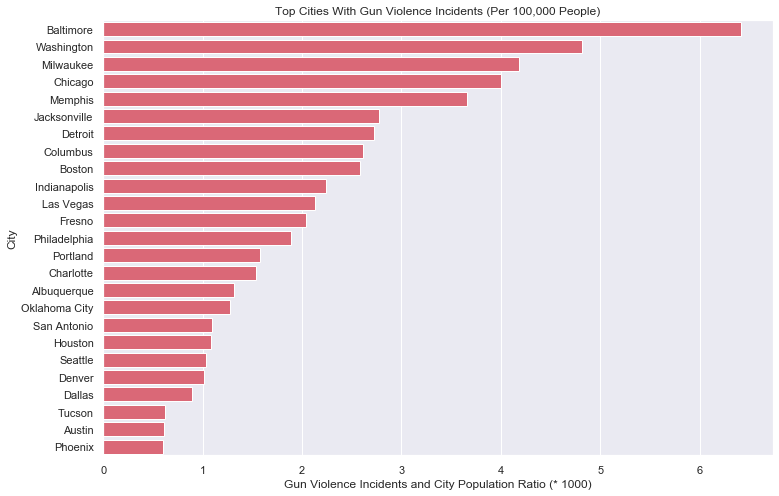

In [154]:
population = {'Carol Stream': '40069', 'La Quinta': '40956', 'Leander': '42761', 'Edinburg': '87650', 'Chino Hills': '78822', 'Pinellas Park': '52137', 'Pacifica': '39062', 'San Luis Obispo': '47536', 'Apache Junction': '39954', 'Toledo': '278508', 'Nampa': '91382', 'Jurupa Valley': '103541', 'Renton': '100953', 'Joplin': '52195', 'Pomona': '152494', 'Hoover': '84978', 'Columbia': '134309', 'Maple Grove': '69576', 'Rowlett': '61999', 'Bayonne': '66238', 'Fremont': '233136', 'Scottsdale': '246645', 'Bozeman': '45250', 'El Paso': '683080', 'Santa Maria': '106290', 'Cedar Park': '68918', 'Shelton': '41334', 'Atlanta': '472522', 'Kettering': '55306', 'Bartlett': '58622', 'Orem': '97499', 'Bullhead City': '39970', 'Bradenton': '55687', 'Waterloo': '67934', 'Scranton': '77291', 'Glendora': '51851', 'Lakeland': '106420', 'West Valley City': '136574', 'Moreno Valley': '205499', 'Brea': '42471', 'Normal': '54264', 'Bolingbrook': '74518', 'Rocky Mount': '55466', 'Redding': '91808', 'Chico': '91567', 'Virginia Beach': '452602', 'Charlotte': '842051', 'Parker': '51163', 'Bloomington': '85319', 'Wake Forest': '40112', 'Beaumont': '118299', 'Huntersville': '54839', 'Oakland Park': '44326', 'Beavercreek': '46376', 'Broken Arrow': '107403', 'Seattle': '704352', 'Santa Barbara': '91930', 'Sandy': '95836', 'El Monte': '115807', 'Grand Island': '51517', 'Santa Monica': '92478', 'Ocala': '59253', 'Oro Valley': '43781', 'Waco': '134432', 'Midwest City': '57305', 'Allentown': '120443', 'Garden Grove': '174858', 'Bellflower': '77790', 'Denver': '693060', 'Minot': '48743', 'Des Plaines': '58141', 'Burlington': '52709', 'Orange': '140504', 'Dunwoody': '48884', 'San Mateo': '103959', 'Minnetonka': '52369', 'Eagan': '66428', 'Oceanside': '175464', 'Avondale': '82881', 'Alameda': '78906', 'San Diego': '1406630', 'Haverhill': '62873', 'Waukegan': '88182', 'Daytona Beach': '66645', 'Grove City': '39721', 'Altoona': '44589', 'Hamilton': '62127', 'Kirkland': '87701', 'Honolulu': '351792', 'Macon-Bibb County': '152555', 'Stillwater': '49504', 'Colorado Springs': '465101', 'Cedar Hill': '48343', 'Jupiter': '63813', 'Overland Park': '188966', 'Boise City': '223154', 'Missoula': '72364', 'Burbank': '104447', 'Youngstown': '64312', 'Sunnyvale': '152771', 'Hoboken': '54379', 'Ankeny': '58627', 'Harrisonburg': '53078', 'Rancho Santa Margarita': '48969', 'Fitchburg': '40414', 'Revere': '53157', 'Fountain Valley': '56529', 'San Bruno': '42957', 'Pembroke Pines': '168587', 'Friendswood': '39396', 'Bountiful': '44078', 'Terre Haute': '60852', 'Methuen': '49917', 'Las Vegas': '632912', 'South San Francisco': '66980', 'Cedar Falls': '41390', 'Carlsbad': '113952', 'Quincy': '93688', 'Waterbury': '108272', 'Thornton': '136703', 'Mount Pleasant': '84170', 'Livermore': '89115', 'Lansing': '116020', 'Richmond': '223170', 'Providence': '179219', 'Clearwater': '114361', 'Pasadena': '153351', 'Clovis': '106583', 'Augusta-Richmond County': '197081', 'Lacey': '47688', 'East Providence': '47337', 'Columbus': '860090', 'Indianapolis': '855164', 'Danbury': '84992', 'Sarasota': '56610', 'Mountain View': '80447', 'South Bend': '101735', 'Watsonville': '53796', 'Ann Arbor': '120782', 'Valdosta': '56474', 'Berwyn': '55748', 'Akron': '197633', 'Memphis': '652717', 'Enid': '51004', 'Brighton': '38314', 'Lake Charles': '76848', 'West Lafayette': '45872', 'Littleton': '46333', 'Orlando': '277173', 'Loveland': '76897', 'Spanish Fork': '38861', 'Edmonds': '41840', 'Goose Creek': '42039', 'Monterey Park': '61075', 'Woburn': '39452', 'Upland': '76684', 'Edina': '51350', 'Bowling Green': '65234', 'Oxnard': '207906', 'San Rafael': '58954', 'Costa Mesa': '112822', 'Roseville': '132671', 'Birmingham': '212157', 'Bothell': '44546', 'Buckeye': '64629', 'Oklahoma City': '638367', 'Broomfield': '66529', 'Hattiesburg': '46926', 'West Des Moines': '64560', 'Denton': '133808', 'Weslaco': '40033', 'Flagstaff': '71459', 'Annapolis': '39418', 'Yucaipa': '53309', 'West Palm Beach': '108161', 'West Jordan': '113699', 'Bonita Springs': '54198', 'Plainfield': '50636', 'Buffalo Grove': '41346', 'Utica': '60652', 'Paterson': '147000', 'Fond du Lac': '42951', 'Harlingen': '65539', 'Ocoee': '44820', 'Moline': '42250', 'Paramount': '54909', 'Winter Garden': '41988', 'Phoenix': '1615017', 'State College': '41992', 'Irving': '238289', 'Edmond': '91191', 'Manhattan': '54983', 'Pocatello': '54746', 'Hartford': '123243', 'Missouri City': '74561', 'Summerville': '49323', 'Joliet': '148262', 'Azusa': '49628', 'Alpharetta': '65338', 'Boynton Beach': '75569', 'North Las Vegas': '238702', 'Sioux Falls': '174360', 'Chattanooga': '177571', 'Port Orange': '61105', 'Federal Way': '96757', 'Lexington-Fayette': '318449', 'Riverton': '42838', 'Chesapeake': '237940', 'Compton': '97550', 'Smyrna': '56664', 'Rock Island': '38210', 'Duluth': '86293', 'Petaluma': '60530', 'Doral': '57947', 'Wheaton': '53389', 'Oak Park': '51774', 'Wheeling': '38315', 'St. Louis': '311404', 'Ceres': '48278', 'Tallahassee': '190894', 'Lakewood': '154393', 'Mount Prospect': '54171', 'Nashua': '87882', 'Rocklin': '62787', 'Woonsocket': '41406', 'Salinas': '157218', 'Janesville': '64159', 'New Rochelle': '79557', 'Euclid': '47360', 'Turlock': '72796', 'Schenectady': '64913', 'McKinney': '172298', 'Yorba Linda': '68235', 'Redondo Beach': '67867', 'Bowie': '58393', 'Grapevine': '51971', 'Arlington': '392772', 'Perth Amboy': '52499', 'Wyoming': '75567', 'Montgomery': '200022', 'Newark': '281764', 'Apple Valley': '72553', 'Wilson': '49620', 'Sandy Springs': '105703', 'Charlottesville': '46912', 'Warwick': '81579', 'Pico Rivera': '63635', 'Irvine': '266122', 'Waltham': '63002', 'Chesterfield': '47659', 'Palm Beach Gardens': '53778', 'Lodi': '64641', 'Stanton': '38644', 'Thousand Oaks': '128888', 'Harrisburg': '48904', 'Elyria': '53715', 'Marlborough': '39697', 'Menifee': '88531', 'Fort Wayne': '264488', 'Conroe': '82286', 'Medford': '81636', 'Rochester Hills': '73422', 'Jonesboro': '74889', 'Carrollton': '133351', 'Lenexa': '52903', 'West New York': '53343', 'Vallejo': '121299', 'Cutler Bay': '44707', 'Norfolk': '245115', 'Rogers': '65021', 'Colton': '54712', 'Miami': '453579', 'Lorain': '63730', 'Kyle': '39060', 'Cerritos': '50555', 'Topeka': '126808', 'Kenosha': '99631', 'New Britain': '72558', 'Brookhaven': '52444', 'Glenview': '47475', 'Montclair': '38944', 'Tigard': '51902', 'Indio': '88488', 'East Lansing': '48870', 'North Port': '64274', 'Pittsburg': '70679', 'Savannah': '146763', 'Newton': '89045', 'Pharr': '77320', 'Fort Worth': '854113', 'McAllen': '142212', 'Palm Coast': '85109', 'North Little Rock': '66278', 'Gary': '76424', 'Orland Park': '58862', 'Gilroy': '55069', 'Coppell': '41360', 'Maricopa': '46903', 'Pearland': '113570', 'Sparks': '98345', 'Evanston': '74895', 'San Clemente': '65309', 'Hesperia': '93724', 'Port St. Lucie': '185132', 'Reading': '87575', 'Rosemead': '54500', 'Gilbert': '237133', 'Laredo': '257156', 'Folsom': '77271', 'Bossier City': '68485', 'Elizabeth': '128640', 'Westland': '81545', 'Everett': '109043', 'Hawthorne': '88031', 'Dubuque': '58531', 'Hilton Head Island': '40500', 'Palm Bay': '110104', 'Newport News': '181825', 'Hanford': '55547', 'Manchester': '110506', 'Chino': '87776', 'Euless': '54769', 'Cranston': '81034', 'Miami Beach': '91917', 'St. Charles': '69293', 'Florissant': '51776', 'Diamond Bar': '56793', 'Iowa City': '74398', 'Kentwood': '51689', 'Barnstable Town': '44254', 'Frisco': '163656', 'Tucson': '530706', 'Apopka': '49458', 'Urbandale': '43018', 'St. Louis Park': '48747', 'Westfield': '41552', 'Redwood City': '84950', 'Buffalo': '256902', 'Cambridge': '110651', 'Lake Oswego': '38945', 'Boston': '673184', 'Kennewick': '80454', 'Dayton': '140489', 'Delray Beach': '67371', 'Layton': '75655', 'Owensboro': '59273', 'Sunrise': '93734', 'Arlington Heights': '75525', 'Huntington': '48113', 'Erie': '98593', 'Longview': '82055', 'Norwalk': '106178', 'Sanford': '58605', 'Ontario': '173212', 'Eastvale': '61151', 'Georgetown': '67140', 'Noblesville': '60183', 'Jackson': '169148', 'Hollywood': '151998', 'New Braunfels': '73959', 'Miramar': '138449', 'West Haven': '54516', 'Prescott Valley': '43132', 'Novi': '59211', 'Rancho Palos Verdes': '42435', 'Placentia': '52228', 'Miami Gardens': '113058', 'Alhambra': '85474', 'Jeffersonville': '47124', 'Blue Springs': '54431', 'Shreveport': '194920', 'Escondido': '151613', 'Mesa': '484587', 'Cathedral City': '54056', 'Sioux City': '82872', 'Lincoln': '280364', 'Great Falls': '59178', 'Vineland': '60525', 'Rockville': '66940', 'Hagerstown': '40452', 'La Crosse': '52109', 'Fort Smith': '88133', 'Tinley Park': '56831', 'Malden': '60840', 'Beverly': '41365', 'Lawton': '94653', 'Flower Mound': '73547', 'Kalamazoo': '75984', 'Wichita Falls': '104724', 'Concord': '128726', 'Morgan Hill': '44155', 'Anderson': '55130', 'Schertz': '39453', 'Auburn': '77472', 'New York': '8537673', 'Hendersonville': '57050', 'Hurst': '39160', 'Casper': '59324', 'Ormond Beach': '42162', 'Buena Park': '83156', 'Haltom City': '44361', 'Rockwall': '43586', 'Abilene': '122225', 'Crystal Lake': '40339', 'Lubbock': '252506', 'Sumter': '40723', 'Philadelphia': '1567872', 'Westminster': '113875', 'Downey': '113267', 'Parma': '79425', 'Danville': '44631', 'DeKalb': '43194', 'Fort Myers': '77146', 'North Lauderdale': '43699', 'Torrance': '147195', 'Odessa': '117871', 'Sayreville': '44905', 'Shoreline': '55333', 'Muskogee': '38352', 'Mankato': '41720', 'Linden': '42457', 'Logan': '50676', 'Grand Junction': '61881', 'Grand Rapids': '196445', 'Carpentersville': '38291', 'Antioch': '110898', 'Sheboygan': '48686', 'Appleton': '74370', 'Dothan': '68468', 'Decatur': '72706', 'Pueblo': '110291', 'Greenacres': '40013', 'Hallandale Beach': '39500', 'Elk Grove': '169743', 'Cape Girardeau': '39628', 'Ogden': '86701', 'Frederick': '70060', 'Lafayette': '127626', 'Manassas': '41483', 'Prescott': '42513', 'Kannapolis': '47839', 'San Bernardino': '216239', 'Pleasant Grove': '38756', 'Romeoville': '39706', 'El Centro': '44201', 'Galveston': '50550', 'Trenton': '84056', 'Fall River': '88930', 'Chapel Hill': '59246', 'Coral Gables': '50815', 'Union City': '75322', 'Coon Rapids': '62359', 'Suffolk': '89273', 'Lauderhill': '71626', 'Encinitas': '63131', 'Bend': '91122', 'La Puente': '40377', 'Corpus Christi': '325733', 'Marion': '38480', 'Duncanville': '39457', 'Hickory': '40567', 'Sierra Vista': '43208', 'Hammond': '77134', 'Shawnee': '65194', 'South Gate': '95538', 'Burnsville': '61290', 'Ames': '66191', 'Davis': '68111', 'Clarksville': '150287', 'Kent': '127514', 'Charleston': '134385', 'Collierville': '49177', 'Lynchburg': '80212', 'Independence': '117030', 'Henderson': '292969', 'Redmond': '62458', 'Tulsa': '403090', 'Laguna Niguel': '65328', 'Sacramento': '495234', 'Johns Creek': '83873', 'Lewisville': '104659', 'York': '43859', 'Fishers': '90127', 'DeSoto': '52599', 'Biloxi': '45975', 'Whittier': '86883', 'Camarillo': '67363', 'Redlands': '71288', 'The Colony': '42408', 'Saginaw': '48984', 'Altamonte Springs': '43492', 'Dublin': '59583', 'Jefferson City': '43013', 'Cedar Rapids': '131127', 'Mentor': '46732', 'Sherman': '41567', 'Rio Rancho': '96028', 'Largo': '83065', 'St. Cloud': '67641', 'Niagara Falls': '48632', 'Santa Clarita': '181972', 'Olympia': '51202', 'Warner Robins': '74388', 'Moore': '61415', 'Sammamish': '63773', 'Washington': '681170', 'Covington': '40797', 'Minneapolis': '413651', 'Cuyahoga Falls': '49206', 'Visalia': '131074', 'Livonia': '94041', 'Salt Lake City': '193744', 'Casa Grande': '54534', 'Allen': '99179', 'Chula Vista': '267172', 'Pawtucket': '71427', 'White Plains': '58241', 'Camden': '74420', 'Manteca': '76908', 'Gulfport': '72076', 'Rochester': '208880', 'Fontana': '209665', 'Knoxville': '186239', 'San Leandro': '90465', 'Arvada': '117453', 'Rapid City': '74048', 'Kokomo': '57799', 'Bremerton': '40675', 'Cheyenne': '64019', 'Grand Forks': '57339', 'Surprise': '132677', 'Downers Grove': '49473', 'San Buenaventura (Ventura)': '109592', 'Evansville': '119477', 'St. Peters': '57289', 'Cicero': '82992', 'Coral Springs': '130059', 'Poway': '50077', 'Southaven': '53214', 'Taylorsville': '60436', 'Pontiac': '59698', 'Hempstead': '55555', 'Wausau': '38872', 'Aurora': '361710', 'Lehi': '61130', 'New Orleans': '391495', 'Elmhurst': '46387', 'Los Angeles': '3976322', 'Strongsville': '44631', 'San Antonio': '1492510', 'Rockford': '147651', 'Marana': '43474', 'Kenner': '67089', 'North Charleston': '109298', 'Bell Gardens': '42806', 'Bridgeport': '145936', 'Hoffman Estates': '51738', 'Blacksburg': '45038', 'Milford': '52536', 'Tustin': '80395', 'Round Rock': '120892', 'Streamwood': '40166', 'College Station': '112141', 'Sugar Land': '88177', 'Pompano Beach': '109393', 'Maplewood': '40150', 'Cupertino': '60643', 'Portsmouth': '95252', 'Daly City': '106472', 'Battle Creek': '51534', 'Santa Fe': '83875', 'Holyoke': '40280', 'Modesto': '212175', 'Mesquite': '143736', 'La Mirada': '49216', 'Eden Prairie': '63914', 'Tacoma': '211277', 'Cypress': '48906', 'Weymouth Town': '55972', 'Palm Springs': '47689', 'Santa Clara': '125948', 'Kearny': '42126', 'Delaware': '38643', 'Fullerton': '140721', 'San Gabriel': '40404', 'Schaumburg': '74446', 'Santa Ana': '334217', 'Riverside': '324722', 'Lompoc': '43712', 'Temple': '73600', 'Peachtree Corners': '42773', 'Cary': '162320', 'Victorville': '122265', 'Johnson City': '66677', 'Chicago': '2704958', 'Cape Coral': '179804', 'Farmington': '41629', 'Apex': '47349', 'El Cajon': '103768', 'Marietta': '60941', 'Mansfield': '65631', 'Perris': '76331', 'Twin Falls': '48260', 'League City': '102010', 'Germantown': '39056', 'Rohnert Park': '42622', 'New Bedford': '95032', 'Port Arthur': '55427', 'Leominster': '41663', 'Puyallup': '40640', 'Wellington': '63900', 'West Allis': '60087', 'Anaheim': '351043', 'Richardson': '113347', 'Fayetteville': '204759', 'Davenport': '102612', 'New Brunswick': '56910', 'Sterling Heights': '132427', 'Elgin': '112123', "Lee's Summit": '96076', 'Conway': '65300', 'Deltona': '90124', 'North Miami Beach': '43891', 'Merced': '82594', 'Worcester': '184508', 'Delano': '52707', 'Martinez': '38259', 'Salem': '167419', 'Bethlehem': '75293', 'St. George': '82318', 'Cleveland': '385809', 'Campbell': '40939', 'Lynwood': '71187', 'Leesburg': '52607', 'Somerville': '81322', 'City': '2016 Population', 'Temecula': '113054', 'Inglewood': '110654', 'Bismarck': '72417', 'Murrieta': '111674', 'Pensacola': '53779', 'Hackensack': '44756', 'Plantation': '92706', 'St. Clair Shores': '59775', 'Coachella': '44953', 'Chandler': '247477', 'Lowell': '110558', 'Oak Lawn': '56257', 'Mishawaka': '48679', 'Norwich': '39556', 'Huntsville': '193079', 'Lake Havasu City': '53743', 'Amarillo': '199582', 'Hemet': '84281', 'Mobile': '192904', 'Fort Pierce': '45295', 'Rancho Cordova': '72326', 'San Ramon': '75639', 'Oshkosh': '66579', 'Muskegon': '38349', 'Plano': '286057', 'Beaverton': '97590', 'Waukesha': '72363', 'San Angelo': '100702', 'Centennial': '109932', 'Bakersfield': '376380', 'Gastonia': '75536', 'Chelsea': '39699', 'Anchorage': '298192', 'Athens-Clarke County': '123371', 'Freeport': '43279', 'Kansas City': '481420', 'Skokie': '64270', 'Deerfield Beach': '79764', 'Culver City': '39364', 'Raleigh': '458880', 'Bristol': '60147', 'Glendale': '245895', 'Monroe': '49297', 'Rialto': '103314', 'Carmel': '91065', 'Houston': '2303482', 'Hampton': '135410', 'Garland': '234943', 'Cleveland Heights': '44633', 'Gresham': '111523', 'Reno': '245255', 'Council Bluffs': '62524', 'Citrus Heights': '87432', 'Des Moines': '215472', 'Milwaukee': '595047', 'Portland': '639863', 'Elkhart': '52221', 'St. Paul': '302398', 'Roanoke': '99660', 'Albany': '98111', 'Middletown': '48813', 'Richland': '54989', 'Woodland': '59068', 'Provo': '116868', 'Titusville': '46019', 'Tamarac': '65199', 'Tyler': '104798', 'Indian Trail': '38222', 'Santa Rosa': '175155', 'San Francisco': '870887', 'Plant City': '38200', 'Yuma': '94906', 'Spokane Valley': '96340', 'Bellevue': '141400', 'Champaign': '86637', 'Shakopee': '40610', 'Grand Prairie': '190682', 'Victoria': '67670', 'Flint': '97386', 'Marysville': '67626', 'Berkeley': '121240', 'Oakley': '40622', 'Dearborn': '94444', 'Palmdale': '157356', 'Chicopee': '55991', 'Tampa': '377165', 'Greenwood': '56545', 'Palm Desert': '52231', 'East Orange': '64789', 'Pine Bluff': '43841', 'Corona': '166785', 'Winston-Salem': '242203', 'Bellingham': '87574', 'Burleson': '45016', 'Castle Rock': '57666', 'Attleboro': '44434', 'Canton': '71323', 'Walnut Creek': '69122', 'Alexandria': '155810', 'Cincinnati': '298800', 'Fresno': '522053', 'West Covina': '107847', 'Kingsport': '52806', 'Hialeah': '236387', 'Long Beach': '470130', 'Troy': '83641', 'Durham': '263016', 'Wilkes-Barre': '40569', 'San Jacinto': '47413', 'San Marcos': '95261', 'Naperville': '147122', 'Warren': '135125', 'Rock Hill': '72937', 'Milpitas': '77528', 'Santee': '57834', 'Lynn': '92697', 'Caldwell': '53149', 'Gainesville': '131591', 'Palatine': '68766', 'Napa': '80416', 'Baytown': '75992', 'Louisville/Jefferson County': '616261', 'Baldwin Park': '76464', 'National City': '61147', 'Muncie': '69010', 'Goodyear': '77258', 'Meridian': '95623', 'Eugene': '166575', 'Murfreesboro': '131947', 'Jersey City': '264152', 'Draper': '47328', 'Passaic': '70635', 'Pittsburgh': '303625', 'Yakima': '93986', 'Albuquerque': '559277', 'Nashville-Davidson': '660388', 'North Richland Hills': '69798', 'Brockton': '95630', 'Syracuse': '143378', 'Arcadia': '58523', 'Spokane': '215973', 'Killeen': '143400', 'Wichita': '389902', 'San Jose': '1025350', 'Davie': '101871', 'High Point': '111223', 'Las Cruces': '101759', 'Longmont': '92858', 'Margate': '57870', 'Brownsville': '183823', 'Oviedo': '39337', 'Madison': '252551', 'Taylor': '61177', 'Fort Collins': '164207', 'Westerville': '38985', 'Atlantic City': '38735', 'Peabody': '52491', 'Commerce City': '54869', 'Tuscaloosa': '99543', 'Roy': '38201', 'Blaine': '62892', 'La Habra': '61664', 'Huntington Beach': '200652', 'Keizer': '38980', 'Brooklyn Park': '79707', 'Rancho Cucamonga': '176534', 'Pasco': '70579', 'Salina': '47336', 'Midland': '134610', 'Dallas': '1317929', 'Urbana': '42014', 'Novato': '56004', 'Winter Haven': '38953', 'Greenville': '91495', 'St. Petersburg': '260999', 'Fairfield': '114756', 'Portage': '48508', 'Meriden': '59622', 'Tulare': '62779', 'Corvallis': '57110', 'Racine': '77571', 'Boulder': '108090', 'Fort Lauderdale': '178752', 'Findlay': '41422', 'Norman': '122180', 'Lawrence': '95358', 'Aliso Viejo': '51424', 'Baton Rouge': '227715', 'Asheville': '89121', 'Santa Cruz': '64465', 'Newport Beach': '86688', 'Binghamton': '45672', 'Billings': '110323', 'Olathe': '135473', 'Kissimmee': '69369', 'Vacaville': '98303', 'Calexico': '40232', 'Homestead': '67996', 'Green Bay': '105139', 'Bryan': '83260', 'Boca Raton': '96114', 'Bedford': '49528', "Coeur d'Alene": '50285', 'Hutchinson': '41310', 'Little Rock': '198541', 'Detroit': '672795', 'Lake Forest': '83240', 'Belleville': '41906', 'Franklin': '74794', 'Porterville': '58978', 'New Berlin': '39803', 'Highland': '54939', 'Austin': '947890', 'Greensboro': '287027', 'Southfield': '73100', 'Lake Elsinore': '64205', 'Stockton': '307072', 'Mission Viejo': '96396', 'Mount Vernon': '68344', 'Greeley': '103990', 'Madera': '64444', 'Murray': '49230', 'Pleasanton': '82270', 'Lombard': '43815', 'Lakeville': '61938', 'North Miami': '62139', 'Gaithersburg': '67776', 'Florence': '39959', 'Bentonville': '47093', 'Lancaster': '160106', 'Vista': '101659', 'Wylie': '47701', 'Yonkers': '200807', 'Springdale': '78557', 'Huntington Park': '58879', 'Dearborn Heights': '55761', 'Texas City': '48262', 'Pflugerville': '59245', 'Carson': '92797', 'Fargo': '120762', 'Idaho Falls': '60211', 'Vancouver': '174826', 'Little Elm': '42504', 'Hillsboro': '105164', 'Springfield': '167319', 'Coconut Creek': '59405', 'Weston': '70015', 'Wauwatosa': '47945', 'Tempe': '182498', 'Woodbury': '68820', 'Simi Valley': '126327', 'St. Joseph': '76472', 'Farmington Hills': '81129', 'South Jordan': '69034', 'Tracy': '89274', 'Hayward': '158937', 'Jacksonville': '880619', 'Milton': '38411', 'Carson City': '54742', 'Omaha': '446970', 'Northglenn': '38982', 'Yuba City': '66845', 'Wilmington': '117525', 'Gardena': '60048', 'Melbourne': '81185', 'Plymouth': '77216', 'Palo Alto': '67024', "O'Fallon": '86274', 'Eau Claire': '68339', 'Baltimore': '614664', 'Brentwood': '60532', 'New Haven': '129934', 'Covina': '48549', 'Pittsfield': '42846', 'Roswell': '94598', 'Taunton': '56843', 'Tupelo': '38842', 'Clifton': '85845', 'Mission': '83563', 'Montebello': '63335', 'West Sacramento': '52981', 'La Mesa': '59948', 'Royal Oak': '59006', 'Stamford': '129113', 'Keller': '46646', 'Moorhead': '42492', 'Oakland': '420005', 'Peoria': '164173', 'Burien': '50997'}
df['city_population'] = df['city_or_county'].apply(lambda x : int(population[x]) if x in population else 0)

tempdf = df.groupby(by=['city_or_county']).agg({'n_killed': 'sum', 'n_injured' : 'sum', 'city_population' : 'mean', 'state' : 'count'}).reset_index().rename(columns={'state' : 'total_incidents', 'n_killed' : 'total_killed', 'n_injured' : 'total_injured'})
tempdf['incidents_population_ratio'] = 1000*tempdf['total_incidents'] / (tempdf['city_population']+1) 
tempdf['killed_population_ratio'] = 1000*tempdf['total_killed'] / (tempdf['city_population']+1) 
tempdf['injured_population_ratio'] = 1000*tempdf['total_injured'] / (tempdf['city_population']+1) 
tempdf['loss_population_ratio'] = 1000*(tempdf['total_killed'] + tempdf['total_injured']) / (tempdf['city_population']+1) 

i_p = tempdf.sort_values(['incidents_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y='city_or_county', x='incidents_population_ratio', data=i_p, color='#ed5569')
ax.set(xlabel='Gun Violence Incidents and City Population Ratio (* 1000)', ylabel='City')
ax.set_title('Top Cities With Gun Violence Incidents (Per 100,000 People)');

> Baltimore (City in Maryland) has the highest ratio of GunViolence Incidents and City Population, In contrast to Chicago where absolute number of gun violence incidents was highest. Baltimore had 3943 total gun violence incidents and its population in 2017 was 614,664. Chicago had more than 10,000 gun violence incidents in recent years, but it is one of the most populated city of US (2017 population = 2704958) and its ratio of gunviolence incidents and population comes at number four after Baltimore, Washingon, and Milwaukee.


### <a id="3.5">3.5 Population Adjusted Dataset - Top Cities (People Killed Per 100,000 People)</a>

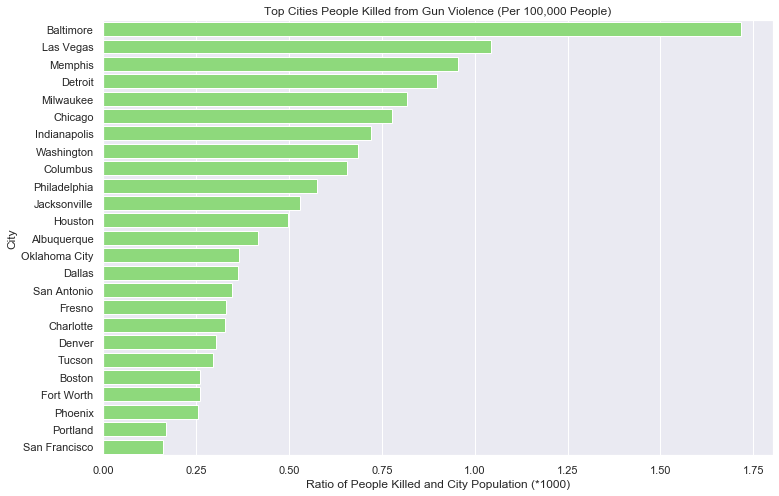

In [155]:
i_p = tempdf.sort_values(['killed_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y='city_or_county', x='killed_population_ratio', data=i_p, color='#85e86d')
ax.set(xlabel='Ratio of People Killed and City Population (*1000)', ylabel='City')
ax.set_title('Top Cities People Killed from Gun Violence (Per 100,000 People)');

> Baltimore again tops the list as there are about 1000 people which were killed in gun violence incidents and this ratio is equal to 1.716382. Las Vegas with 632912 and Memphis with the population size of 652717 comes at 2nd and 3rd place as 660 and 623 people were killed. Their respecitve killed to population ratio is 1.04 and 0.95. Chicago, where maximum incidents has occured has the killed to population ratio of 0.77 which comes at 6th spot.


### <a id="3.6">3.6 Population Adjusted Dataset - Top Cities (People Injured Per 100,000 People)</a>

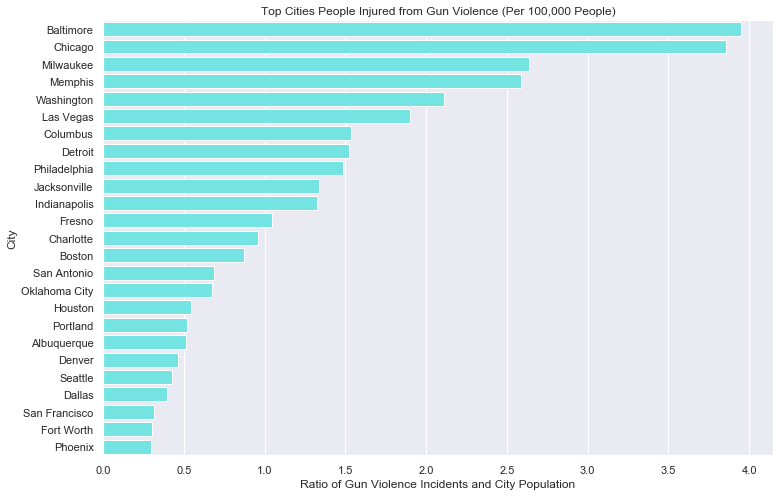

In [156]:
i_p = tempdf.sort_values(['injured_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y='city_or_county', x='injured_population_ratio', data=i_p, color='#60f7f4')
ax.set(xlabel='Ratio of Gun Violence Incidents and City Population', ylabel='City')
ax.set_title('Top Cities People Injured from Gun Violence (Per 100,000 People)');

> Baltmore and Chicago are the cities with highest ratio of people injured in gun violence incidents and city population. Apart from these, Milwaukee, Memphis, and Washington are other top cities where the ratio of people getting injured in gun violence incidents is quite higher .


### <a id="3.7">3.7 Common Areas of Gun Violence Incidents </a>

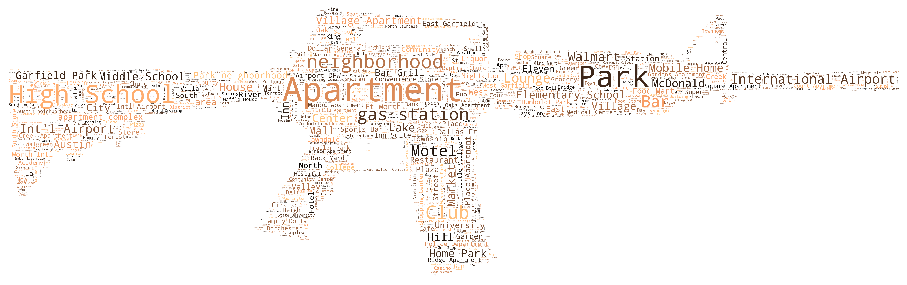

In [27]:
mask = np.array(Image.open(r"C:\Users\Bara Elshaer\Pictures\Saved Pictures\51029.jpg"))
txt = " ".join(df['location_description'].dropna())
wc = WordCloud(mask=mask, max_words=1200, stopwords=STOPWORDS, colormap='copper', background_color='White').generate(txt)
plt.figure(figsize=(16,18))
plt.imshow(wc)
plt.axis('off')
plt.title('');

> The above word colud depicts that most number of gun violence incidents are reported in High School, Apartment, Parks, Gas Station, Walmart, Motel, Bar, Club etc. 

## <a id="4">4. Other Characteristics of Gun Violence Incidents </a>

### <a id="4.1">4.1 Number of Guns Used (greater than 1) </a>

In [157]:
df['n_guns'] = df['n_guns_involved'].apply(lambda x : "10+" if x>=10 else str(x))

tempdf = df['n_guns'].value_counts().reset_index()
tempdf = tempdf[tempdf['index'] != 'nan']
tempdf = tempdf[tempdf['index'] != '1.0']

labels = list(tempdf['index'])
values = list(tempdf['n_guns'])

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1', '#c0d1ed', '#efaceb', '#f5f794', '#94f794', '#fcc771']))
layout = dict(height=500, title='Number of Guns Used in an Incident', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

### <a id="4.2">4.2 Most Serious Gun Violence Incidents </a>

Locating the most serious gun violence incidents occured in the recent past. Most serious incidents are defiend by the total number of killings and injured 

In [30]:
df1 = df.sort_values(['loss'], ascending=[False])
df1[['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured']].head(10)

,date,state,city_or_county,address,n_killed,n_injured
239677,2017-10-01,Nevada,Las Vegas,Mandalay Bay 3950 Blvd S,59,489
130448,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53
217151,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20
101531,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19
232745,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17
70511,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18
195845,2017-07-01,Arkansas,Little Rock,220 W 6th St,0,25
137328,2016-07-25,Florida,Fort Myers,3580 Evans Ave,2,19
11566,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16
92624,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9


Plotting the locations of these incidents on the map:

In [31]:
smalldf = df[df['n_killed'] >= 3][['latitude', 'longitude', 'loss', 'n_killed']].dropna()
map1 = folium.Map(location=[39.50, -98.35], tiles='CartoDB dark_matter', zoom_start=3.5)
map2 = folium.Map([39.50, -98.35], zoom_start=3.5, tiles='cartodbdark_matter')
markers = []
for i, row in smalldf.iterrows():
    loss = row['loss']
    if row['loss'] > 100:
        loss = row['loss']*0.1    
    folium.CircleMarker([float(row['latitude']), float(row['longitude'])], radius=float(loss), color='#ef4f61', fill=True).add_to(map1)

map1

Plotting only the top 10 incidents by the loss:

In [40]:
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]


def returnsize(x):
    if x > 200:
        return 60
    elif x > 80:
        return 40
    elif x > 30:
        return 25
    elif x > 10:
        return 15
    elif x > 5: 
        return 10
    else:
        return 5

df1['size'] = df1['loss'].apply(lambda x: returnsize(x))
dfs = df1.head(50)

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = dfs['longitude'],
        lat = dfs['latitude'],
        text = dfs['city_or_county'],
        mode = 'markers',
        marker = dict(size = dfs['size'], opacity = 0.5, cmin = 0,))]

layout = dict(
        title = 'Most Serious Gun Violence Incidents in US by Death Toll',
        colorbar = True,
        geo = dict(projection=dict( type='albers usa' ),
            subunitcolor = "rgb(221, 221, 221)",
            subunitwidth = 1.0))

fig = dict( data=data, layout=layout )
iplot( fig, validate=False)

> Las Vegas shooting was the most serious gun violence incident in which more than 600 people were harmed, including 60 killings. Following is the Orlando Shooting in 2016 when about 50 people were killed. Another serious mass shooting happened in Texas November 2017 with 25+ people were killed.

### <a id="4.3">4.3 Key characteristics of Gun Violence Incidents </a>

Understanding the key characteristics of gun violence incidents:

In [158]:
from collections import Counter
big_text = "||".join(df['incident_characteristics'].dropna()).split("||")
incidents = Counter(big_text).most_common(20)
xx = [x[0] for x in incidents]
yy = [x[1] for x in incidents]

trace1 = go.Bar(
    x=yy[::-1],
    y=xx[::-1],
    name='Incident Characterisitcs',
    marker=dict(color='purple'),
    opacity=0.3,
    orientation="h")
data = [trace1]
layout = go.Layout(
    barmode='group',
    margin=dict(l=350),
    width=800,
    height=600,
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'Key Incident Characteristics')

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

### <a id="4.4">4.4 Prominent Age of Gun Violence Suspects </a>

Finding the main age-groups of gun violence suspects. I have written a code to get this information by combining multiple columns:  

In [165]:
def get_user_mapping(txt):
    if txt == "NA":
        return {}
    mapping = {}
    for d in txt.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1]
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

df['participant_type'] = df['participant_type'].fillna("NA")
df['participant_type_map'] = df['participant_type'].apply(lambda x : get_user_mapping(x))
df['participant_age'] = df['participant_age'].fillna("NA")
df['participant_age_map'] = df['participant_age'].apply(lambda x : get_user_mapping(x))
df['participant_gender'] = df['participant_gender'].fillna("NA")
df['participant_gender_map'] = df['participant_gender'].apply(lambda x : get_user_mapping(x))

## Finding the Suspect Age Groups
suspect_age_groups = {}
for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_age_map']:
            ag = row['participant_age_map'][suspect]
            if ag not in suspect_age_groups:
                suspect_age_groups[ag] = 0 
            else:
                suspect_age_groups[ag] += 1

trace1 = go.Bar(x=list(suspect_age_groups.keys()), y=list(suspect_age_groups.values()), opacity=0.75, name="month", marker=dict(color='rgba(200, 20, 160, 0.6)'))
layout = dict(height=400, title='Suspects of Gun Violence Age Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


>As shown in this skewed distribution, teenagers aged 18 - 19 are mostly involved with gun violence, which is unfortunate.

### <a id="4.5">4.5 Prominent Age of Gun Violence Victims </a>  

Plotting the ages of victims of gun violence incidents:

In [160]:
victim_age_groups = {}
for i, row in df.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            ag = row['participant_age_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                
trace1 = go.Bar(x=list(victim_age_groups.keys()), y=list(victim_age_groups.values()), opacity=0.75, name="month", marker=dict(color='brown'))
layout = dict(height=400, title='Victims of Gun Violence Age Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

> Similarly, the victims of gun violence are mostly young people starting at age 18-25. This fires up alot of curiosity as to what this means regarding the status of young generation with regards to their emotional and childhood development.  

### <a id="4.6">4.6 Gender Groups - Victims and Suspects </a>  

Plotting the distribution of geneder (suspects and victims):

In [39]:
## find gender groups 
suspect_age_groups = {}
victim_age_groups = {}
for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_gender_map']:
            ag = row['participant_gender_map'][suspect]
            if ag not in suspect_age_groups:
                suspect_age_groups[ag] = 0 
            else:
                suspect_age_groups[ag] += 1
                        
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_gender_map']:
            ag = row['participant_gender_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                
del victim_age_groups['Male, female']
fig = {"data": [
    {"values": list(suspect_age_groups.values()),
     "labels": list(suspect_age_groups.keys()),
     "marker" : dict(colors=['#fc76bb','#b4a9f9']),
     "name": "Suspects",
     "domain": {"x": [0, .48]},
     "hoverinfo":"label+percent+name",
     "hole": .7,
     "type": "pie"},
    {"values": list(victim_age_groups.values()),
     "labels": list(victim_age_groups.keys()),
     "text": ["Victims"],
     "marker" : dict(colors=['#b4a9f9','#fc76bb']),
     "textposition":"inside",
     "domain": {"x": [.52, 1]},
     "name": "Victims",
     "hoverinfo":"label+percent+name",
     "hole": .7,
     "type": "pie"}],
  "layout": { "showlegend" : False,
        "title":"Genders of People Involved",
        "annotations": [{"font": {"size": 20},
        "showarrow": False,"text": "Suspects",
        "x": 0.20,"y": 0.5}, {"font": {"size": 20},
        "showarrow": False, "text": "Victims", "x": 0.8,
        "y": 0.5}]}}

iplot(fig, filename='donut')

## <a id="5">5. Analysis of Number of Guns Registered by State </a>

## <a>Do more guns mean more Gun Violence Incidents ?</a>

According to the [Washington Post](https://www.washingtonpost.com/news/wonk/wp/2015/10/05/guns-in-the-united-states-one-for-every-man-woman-and-child-and-then-some/?noredirect=on&utm_term=.b25eab8e9166), there are more than 350 million guns in the U.S. A compelling insight to see if states with more gun violence incidents are the same states with higher number of guns per capita and vice versa. I obtained the data for the year 2017 from the following source. It consists of data about guns per capita and total guns registered by state.

**Source of Data** - https://www.thoughtco.com/gun-owners-percentage-of-state-populations-3325153

In [167]:
from io import StringIO

ownership = StringIO("""Rank,state,guns_per_capita,guns_registered
1,Wyoming,229.24,132806
2,Washington D.C.,68.05,47228
3,New Hampshire,46.76,64135
4,New Mexico,46.73,97580
5,Virginia,36.34,307822
6,Alabama,33.15,161641
7,Idaho,28.86,49566
8,Arkansas,26.57,79841
9,Nevada,25.64,76888
10,Arizona,25.61,179738
11,Louisiana,24.94,116831
12,South Dakota,24.29,21130
13,Utah,23.48,72856
14,Connecticut,22.96,82400
15,Alaska,21.38,15824
16,Montana,21.06,22133
17,South Carolina,21.01,105601
18,Texas,20.79,588696
19,West Virginia,19.42,35264
20,Pennsylvania,18.45,236377
21,Georgia,18.22,190050
22,Kentucky,18.2,81068
23,Oklahoma,18.13,71269
24,Kansas,18.06,52634
25,North Dakota,17.56,13272
26,Indiana,17.1,114019
27,Maryland,17.03,103109
28,Colorado,16.48,92435
29,Florida,16.35,343288
30,Ohio,14.87,173405
31,North Carolina,14.818,152238
32,Oregon,14.816,61383
33,Tennessee,14.76,99159
34,Minnesota,14.22,79307
35,Washington,12.4,91835
36,Missouri,11.94,72996
37,Mississippi,11.89,35494
38,Nebraska,11.57,22234
39,Maine,11.5,15371
40,Illinois,11.44,146487
41,Wisconsin,11.19,64878
42,Vermont,9.41,5872
43,Iowa,9.05,28494
44,California,8.71,344622
45,Michigan,6.59,65742
46,New Jersey,6.38,57507
47,Hawaii,5.5,7859
48,Massachusetts,5.41,37152
49,Delaware,5.04,4852
50,Rhode Island,3.98,37152
51,New York,3.83,76207""")

ownership = pd.read_csv(ownership)

states_df = df[df['year'] == 2017]['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
statesdf = statesdf.merge(ownership, on='state')

data = [{'x': statesdf['guns_per_capita'],'y': statesdf['counts'],'mode': 'markers',
        'text' : statesdf['state'],'marker': {'color': statesdf['Rank'],'size': 15,
        'showscale' : True,'colorscale' : 'Earth', "colorbar" : dict(title='Rank (guns_per_capita)'),
        'opacity': 0.9}}]

layout = go.Layout(title="Relationship between Guns Per Capita and Gun Violence Incidents by State (2017)", 
                   xaxis=dict(title='Total Guns Registered Per Capita'),
                   yaxis=dict(title='Gun Violence Incidents'))

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')

>According to this data, Wyoming has the highest number of guns registered per capita (equal to 229), however there were only 91 incidents of gun violence in 2017. On the other hand, states such as California, Illinois, and Flordia have lower number of guns registered per capita but number of incidents are quite higher as shown in the top left corner of the above graph.  

Removing outlier states such as Wyoming, California, Illinois, and Florida:

In [49]:

data = [{'x': statesdf['guns_per_capita'],
        'y': statesdf['counts'],
        'mode': 'markers',
        'text' : statesdf['state'],
        'marker': {'color': statesdf['Rank'],
        'size': 15,
        'showscale' : True,
        'colorscale' : 'Earth',
        "colorbar" : dict(title='Rank (guns_per_capita)'),'opacity': 0.9}}]

layout = go.Layout(title="Relationship between Guns Per Capita and Gun Violence Incidents by State (2017)", 
                   xaxis=dict(title='Total Guns Registered Per Capita', range =[0, 50]),
                   yaxis=dict(title='Gun Violence Incidents', range=[0, 3000]))

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')

Plotting the total number of guns registered instead of guns per capita:

In [168]:
data = [{'x': statesdf['guns_registered'],
        'y': statesdf['counts'],
        'mode': 'markers',
        'text' : statesdf['state'],
        'marker': {'color': statesdf['Rank'],
            'size': 15,
            'showscale' : True,
            'colorscale' : 'Picnic',
            "colorbar" : dict(title='Guns Registered'),
            'opacity': 0.9}}]


layout = go.Layout(title="Total Guns Registered Vs GunViolence Incidents by State (2017)", 
                   xaxis=dict(title='Total Guns Registered'),
                   yaxis=dict(title='Gun Violence Incidents'))
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')

> The figure above conveys Texas to be the state with the highest number of gun owners across America. What is most interesting here is that despite being the state with most everyone owning a gun, it has a relatively lower gun violence incident rate compared to other states. Illinois and California are two states that have more gun violence but less gun owners. The numbers of California and Florida suggests that more number of guns owned per person means more gun violence incidents. However, there are caveats when interpreting this figure. First, gun registration is **not** an accurate way of measuring gun ownership because there could be many people with unregistered guns. That's due in large part to lack of national standards for licensing and registering firearms. There could be a possibility that California and Illinois has more gun owners and less guns per capita, thus ruining the premise that more gun owners does not mean more gun violence. However, what this data also tells us that gun registration can play a huge role in decreasing gun violence. What kind of policies and regulations can we make to reduce gun violence in America?  


## <a id="6">6. Gun Laws Imapct on Gun Violence Incidents </a>

Another metric to analyze is the gun laws in each state and how does it correlate with the number of gun violence incidents in those states. I have taken the gun laws data for the following years: 2014, 2015, 2016, 2017 from the following source:

Source:  https://statefirearmlaws.org/national-data/

### <a id="6.1">6.1 Rise of Gun Violence Laws in different States : 2014 - 2018 </a>

In [58]:
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
laws_2014 = {'Mississippi': 5, 'Oklahoma': 9, 'Delaware': 38, 'Minnesota': 39, 'Illinois': 65, 'Arkansas': 11, 'New Mexico': 10, 'Ohio': 15, 'Indiana': 11, 'Maryland': 63, 'Louisiana': 12, 'Texas': 20, 'Wyoming': 6, 'Tennessee': 24, 'Arizona': 8, 'Wisconsin': 24, 'Michigan': 20, 'Kansas': 8, 'Utah': 11, 'Virginia': 12, 'Oregon': 24, 'Connecticut': 85, 'Montana': 4, 'California': 100, 'Idaho': 5, 'West Virginia': 24, 'South Carolina': 12, 'New Hampshire': 10, 'Massachusetts': 101, 'Vermont': 3, 'Georgia': 6, 'North Dakota': 14, 'Pennsylvania': 37, 'Florida': 21, 'Alaska': 3, 'Kentucky': 7, 'Hawaii': 78, 'Nebraska': 22, 'Missouri': 8, 'Iowa': 25, 'Alabama': 10, 'Rhode Island': 43, 'South Dakota': 5, 'Colorado': 30, 'New Jersey': 67, 'Washington': 41, 'North Carolina': 30, 'New York': 76, 'Nevada': 11, 'Maine': 11}
laws_2015 = {'Mississippi': 2, 'Oklahoma': 9, 'Delaware': 38, 'Minnesota': 41, 'Illinois': 65, 'Arkansas': 11, 'New Mexico': 10, 'Ohio': 16, 'Indiana': 11, 'Maryland': 64, 'Louisiana': 12, 'Texas': 20, 'Wyoming': 6, 'Tennessee': 24, 'Arizona': 8, 'Wisconsin': 23, 'Michigan': 21, 'Kansas': 4, 'Utah': 11, 'Virginia': 12, 'Oregon': 33, 'Connecticut': 85, 'Montana': 4, 'California': 102, 'Idaho': 6, 'West Virginia': 24, 'South Carolina': 12, 'New Hampshire': 10, 'Massachusetts': 101, 'Vermont': 6, 'Georgia': 6, 'North Dakota': 14, 'Pennsylvania': 37, 'Florida': 21, 'Alaska': 3, 'Kentucky': 7, 'Hawaii': 78, 'Nebraska': 22, 'Missouri': 8, 'Iowa': 25, 'Alabama': 10, 'Rhode Island': 43, 'South Dakota': 5, 'Colorado': 30, 'New Jersey': 67, 'Washington': 41, 'North Carolina': 30, 'New York': 76, 'Nevada': 15, 'Maine': 11}
laws_2016 = {'Mississippi': 2, 'Oklahoma': 9, 'Delaware': 39, 'Minnesota': 41, 'Illinois': 65, 'Arkansas': 11, 'New Mexico': 10, 'Ohio': 16, 'Indiana': 12, 'Maryland': 64, 'Louisiana': 12, 'Texas': 18, 'Wyoming': 6, 'Tennessee': 22, 'Arizona': 8, 'Wisconsin': 23, 'Michigan': 21, 'Kansas': 4, 'Utah': 11, 'Virginia': 13, 'Oregon': 35, 'Connecticut': 90, 'Montana': 4, 'California': 104, 'Idaho': 2, 'West Virginia': 18, 'South Carolina': 12, 'New Hampshire': 10, 'Massachusetts': 101, 'Vermont': 6, 'Georgia': 6, 'North Dakota': 14, 'Pennsylvania': 37, 'Florida': 21, 'Alaska': 3, 'Kentucky': 7, 'Hawaii': 79, 'Nebraska': 22, 'Missouri': 7, 'Iowa': 25, 'Alabama': 10, 'Rhode Island': 43, 'South Dakota': 5, 'Colorado': 30, 'New Jersey': 67, 'Washington': 43, 'North Carolina': 30, 'New York': 76, 'Nevada': 15, 'Maine': 11}
laws_2017 = {'Mississippi': 2, 'Oklahoma': 9, 'Delaware': 40, 'Minnesota': 41, 'Illinois': 65, 'Arkansas': 11, 'New Mexico': 10, 'Ohio': 16, 'Indiana': 12, 'Maryland': 64, 'Louisiana': 13, 'Texas': 18, 'Wyoming': 6, 'Tennessee': 22, 'Arizona': 8, 'Wisconsin': 23, 'Michigan': 21, 'Kansas': 4, 'Utah': 13, 'Virginia': 13, 'Oregon': 35, 'Connecticut': 90, 'Montana': 4, 'California': 106, 'Idaho': 2, 'West Virginia': 18, 'South Carolina': 12, 'New Hampshire': 9, 'Massachusetts': 101, 'Vermont': 6, 'Georgia': 6, 'North Dakota': 10, 'Pennsylvania': 37, 'Florida': 21, 'Alaska': 3, 'Kentucky': 7, 'Hawaii': 79, 'Nebraska': 22, 'Missouri': 2, 'Iowa': 24, 'Alabama': 10, 'Rhode Island': 53, 'South Dakota': 5, 'Colorado': 30, 'New Jersey': 75, 'Washington': 43, 'North Carolina': 30, 'New York': 76, 'Nevada': 21, 'Maine': 11}

y1, y2, y3, y4 = [], [], [], []
x1 = []
for x, y in laws_2014.items():
    y1.append(y)
    y2.append(laws_2015[x])
    y3.append(laws_2016[x])
    y4.append(laws_2017[x])
    x1.append(x)

trace1 = go.Bar(x=x1,y=y1,name='2014', marker=dict(color="#f27da6"))
trace2 = go.Bar(x=x1,y=y2,name='2015', marker=dict(color="#7f9bef"))
trace3 = go.Bar(x=x1,y=y3,name='2016', marker=dict(color="#94e8ba"))
trace4 = go.Bar(x=x1,y=y4,name='2017', marker=dict(color="#e8d54a"))

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(barmode='group', title="Rise of Gun Laws between 2014 - 2017 by State")
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

### <a id="6.2">6.2 Impact of Number of Gun Laws vs Gun Violence Incidents : 2014 - 2017 </a> 

Analyzing the number of gun laws and gun violence incidents for different states over these years:

In [53]:
states_df = df[df['year'] == 2014]['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
statesdf['laws'] = statesdf['state'].apply(lambda x : laws_2014[x] if x in laws_2014 else "")

statesdf['state'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [{'x': statesdf['laws'],
        'y': statesdf['counts'],
        'mode': 'markers+text',
        'text' : statesdf['state'],
        'textposition' : 'bottom center',
        'marker': {'color': "#7ae6ff",'size': 15, 'opacity': 0.9}}]

layout = go.Layout(title="Gun Laws vs Gun Violence Incidents - 2014", 
                   xaxis=dict(title='Total Gun Laws'),
                   yaxis=dict(title='Gun Violence Incidents'))

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')

In [54]:
states_df = df[df['year'] == 2015]['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
statesdf['laws'] = statesdf['state'].apply(lambda x : laws_2015[x] if x in laws_2015 else "")

statesdf['state'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [{'x': statesdf['laws'],
        'y': statesdf['counts'],
        'mode': 'markers+text',
        'text' : statesdf['state'],
        'textposition' : 'bottom center',
        'marker': {
            'color': "#d889f9",
            'size': 15,
            'opacity': 0.9}}]

layout = go.Layout(title="Gun Laws vs Gun Violence Incidents - 2015", 
                   xaxis=dict(title='Total Gun Laws'),
                   yaxis=dict(title='Gun Violence Incidents'))

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')

In [55]:
states_df = df[df['year'] == 2016]['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
statesdf['laws'] = statesdf['state'].apply(lambda x : laws_2016[x] if x in laws_2016 else "")

statesdf['state'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [{'x': statesdf['laws'],
        'y': statesdf['counts'],
        'mode': 'markers+text',
        'text' : statesdf['state'],
        'textposition' : 'bottom center',
        'marker': {
            'color': "#f27da6",
            'size': 15,
            'opacity': 0.9}}]

layout = go.Layout(title="Gun Laws vs Gun Violence Incidents - 2016", 
                   xaxis=dict(title='Total Gun Laws'),
                   yaxis=dict(title='Gun Violence Incidents'))

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')

In [56]:
states_df = df[df['year'] == 2017]['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
statesdf['laws'] = statesdf['state'].apply(lambda x : laws_2017[x] if x in laws_2017 else "")

statesdf['state'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [{'x': statesdf['laws'],
        'y': statesdf['counts'],
        'mode': 'markers+text',
        'text' : statesdf['state'],
        'textposition' : 'bottom center',
        'marker': {
            'color': "#42f4bc",
            'size': 15,
            'opacity': 0.9}}]

layout = go.Layout(title="Gun Laws vs Gun Violence Incidents - 2017", 
                   xaxis=dict(title='Total Gun Laws'),
                   yaxis=dict(title='Gun Violence Incidents'))

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')

The states California, Massachusetts, Hawaii, New York, New Jersy, Illinois, MaryLand and Rhode Island has considerably higher number of gun laws. Aomng them, only California and Illinois has the most number of gun violence incidents. States such as Texas and Florida have considerabely lower number of gun laws but high number of incidents.  
